In [2]:
import pandas as pd
import sqlite3

# Process LCS Data

In [2]:
lcs_cols = ['timestamp',
 'current_temp_f',
 'current_humidity',
 'current_dewpoint_f',
 'pressure',
 'adc',
 'pm1_0_cf_1',
 'pm2_5_cf_1',
 'pm10_0_cf_1',
 'pm1_0_atm',
 'pm2_5_atm',
 'pm10_0_atm',
 'pm2_5_aqi_cf_1',
 'pm2_5_aqi_atm',
 'p_0_3_um',
 'p_0_5_um',
 'p_1_0_um',
 'p_2_5_um',
 'p_5_0_um',
 'p_10_0_um',
 'pm1_0_cf_1_b',
 'pm2_5_cf_1_b',
 'pm10_0_cf_1_b',
 'pm1_0_atm_b',
 'pm2_5_atm_b',
 'pm10_0_atm_b',
 'pm2_5_aqi_cf_1_b',
 'pm2_5_aqi_atm_b',
 'p_0_3_um_b',
 'p_0_5_um_b',
 'p_1_0_um_b',
 'p_2_5_um_b',
 'p_5_0_um_b',
 'p_10_0_um_b',
 'location']

In [3]:
filepath = '../Data/20230925_113818_Lab_LCS_PurpleAir_20230905.xlsx'
lcs = pd.read_excel(filepath, sheet_name=0, header=0, keep_default_na=False, parse_dates=['UTCDateTime'])
lcs.UTCDateTime = lcs.UTCDateTime.dt.tz_localize('UTC').dt.tz_convert('Asia/Calcutta')
lcs['location'] = filepath.split('/')[-1].split('_')[2]
lcs.rename(columns={'UTCDateTime': 'timestamp',
                    'pm2.5_aqi_cf_1':'pm2_5_aqi_cf_1',	
                    'pm2.5_aqi_atm' : 'pm2_5_aqi_atm',
                    'pm2.5_aqi_cf_1_b' : 'pm2_5_aqi_cf_1_b',
                    'pm2.5_aqi_atm_b' : 'pm2_5_aqi_atm_b',
                    'Location':'location'}, inplace=True)


FileNotFoundError: [Errno 2] No such file or directory: '../Data/20230925_113818_Lab_LCS_PurpleAir_20230905.xlsx'

In [70]:
lcs.timestamp.dt.floor('min')
lcs.timestamp = lcs.timestamp.dt.tz_localize(None).dt.floor('min')
lcs

,timestamp,mac_address,firmware_ver,hardware,current_temp_f,current_humidity,current_dewpoint_f,pressure,adc,mem,...,pm2_5_aqi_cf_1_b,pm2_5_aqi_atm_b,p_0_3_um_b,p_0_5_um_b,p_1_0_um_b,p_2_5_um_b,p_5_0_um_b,p_10_0_um_b,gas,location
0,2023-09-05 16:38:00,30:83:98:ae:87:1f,7.02,2.0+OPENLOG+31954 MB+DS3231+BME280+PMSX003-B+P...,76,67,64,998.82,nan,36392,...,63,63,1899.93,541.02,135.26,10.98,0.67,0.12,,Lab
1,2023-09-05 16:40:00,30:83:98:ae:87:1f,7.02,2.0+OPENLOG+31954 MB+DS3231+BME280+PMSX003-B+P...,77,65,64,998.87,0.04,36616,...,62,62,1960.50,547.19,135.87,7.19,0.00,0.00_x001A__x001A__x001A_,,Lab
2,2023-09-05 16:42:00,30:83:98:ae:87:1f,7.02,2.0+OPENLOG+31954 MB+DS3231+BME280+PMSX003-B+P...,77,63,63,998.84,0.04,36616,...,61,61,1841.74,515.32,121.88,10.23,0.00,0,,Lab
3,2023-09-05 16:44:00,30:83:98:ae:87:1f,7.02,2.0+OPENLOG+31954 MB+DS3231+BME280+PMSX003-B+P...,77,61,62,998.79,0.04,36616,...,60,60,1861.47,513.93,131.44,7.47,0.49,0.25,,Lab
4,2023-09-05 16:46:00,30:83:98:ae:87:1f,7.02,2.0+OPENLOG+31954 MB+DS3231+BME280+PMSX003-B+P...,77,60,62,998.82,0.04,36616,...,67,67,1864.88,541.39,149.32,17.70,0.79,0.12,,Lab
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,2023-09-06 05:12:00,30:83:98:ae:87:1f,7.02,2.0+OPENLOG+31954 MB+DS3231+BME280+PMSX003-B+P...,83,58,66,1000.39,0.04,36616,...,35,35,940.58,266.86,59.89,7.56,0.05,0,,Lab
310,2023-09-06 05:14:00,30:83:98:ae:87:1f,7.02,2.0+OPENLOG+31954 MB+DS3231+BME280+PMSX003-B+P...,83,58,66,1000.42,0.04,36616,...,42,42,986.75,281.00,85.22,9.28,0.40,0.23,,Lab
311,2023-09-06 05:16:00,30:83:98:ae:87:1f,7.02,2.0+OPENLOG+31954 MB+DS3231+BME280+PMSX003-B+P...,83,58,66,1000.42,0.04,36616,...,39,39,975.46,287.83,79.05,6.69,0.51,0.34_x001A__x001A__x001A_,,Lab
312,2023-09-06 05:18:00,30:83:98:ae:87:1f,7.02,2.0+OPENLOG+31954 MB+DS3231+BME280+PMSX003-B+P...,83,58,67,1000.47,0.04,36616,...,36,36,902.30,254.07,69.36,7.48,0.36,0,,Lab


In [70]:
lcs = lcs[lcs_cols]

In [77]:
lcs

,timestamp,current_temp_f,current_humidity,current_dewpoint_f,pressure,adc,pm1_0_cf_1,pm2_5_cf_1,pm10_0_cf_1,pm1_0_atm,...,pm10_0_atm_b,pm2_5_aqi_cf_1_b,pm2_5_aqi_atm_b,p_0_3_um_b,p_0_5_um_b,p_1_0_um_b,p_2_5_um_b,p_5_0_um_b,p_10_0_um_b,location
0,2023-09-05 16:38:41+05:30,76,67,64,998.82,nan,12.00,22.23,22.80,12.00,...,18.26,63,63,1899.93,541.02,135.26,10.98,0.67,0.12,Lab
1,2023-09-05 16:40:41+05:30,77,65,64,998.87,0.04,12.91,23.18,24.46,12.91,...,17.41,62,62,1960.50,547.19,135.87,7.19,0.00,0.00_x001A__x001A__x001A_,Lab
2,2023-09-05 16:42:41+05:30,77,63,63,998.84,0.04,11.04,20.81,21.58,11.04,...,16.74,61,61,1841.74,515.32,121.88,10.23,0.00,0,Lab
3,2023-09-05 16:44:41+05:30,77,61,62,998.79,0.04,11.25,20.73,21.98,11.22,...,16.53,60,60,1861.47,513.93,131.44,7.47,0.49,0.25,Lab
4,2023-09-05 16:46:41+05:30,77,60,62,998.82,0.04,10.95,19.82,20.79,10.95,...,20.29,67,67,1864.88,541.39,149.32,17.70,0.79,0.12,Lab
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,2023-09-06 05:12:56+05:30,83,58,66,1000.39,0.04,5.30,10.29,11.18,5.30,...,8.49,35,35,940.58,266.86,59.89,7.56,0.05,0,Lab
310,2023-09-06 05:14:56+05:30,83,58,66,1000.42,0.04,3.22,8.93,9.18,3.22,...,10.42,42,42,986.75,281.00,85.22,9.28,0.40,0.23,Lab
311,2023-09-06 05:16:56+05:30,83,58,66,1000.42,0.04,5.76,11.12,11.81,5.76,...,9.83,39,39,975.46,287.83,79.05,6.69,0.51,0.34_x001A__x001A__x001A_,Lab
312,2023-09-06 05:18:56+05:30,83,58,67,1000.47,0.04,5.39,12.27,12.59,5.39,...,9.04,36,36,902.30,254.07,69.36,7.48,0.36,0,Lab


In [78]:
conn.close()

# Process Ref Data

In [1]:
import sqlite3
import pandas as pd

In [2]:
connection = sqlite3.connect('../Data/database.db')
cursor = connection.cursor()
cursor.execute("SELECT * from Grimm").fetchall()
names = list(map(lambda x: x[0], cursor.description))

In [3]:
names

['timestamp',
 'Bin0',
 'Bin1',
 'Bin2',
 'Bin3',
 'Bin4',
 'Bin5',
 'Bin6',
 'Bin7',
 'Bin8',
 'Bin9',
 'Bin10',
 'Bin11',
 'Bin12',
 'Bin13',
 'Bin14',
 'Bin15',
 'Bin16',
 'Bin17',
 'Bin18',
 'Bin19',
 'Bin20',
 'Bin21',
 'Bin22',
 'Bin23',
 'MToFBin1',
 'MToFBin3',
 'MToFBin5',
 'MToFBin7',
 'SamplingPeriod',
 'SFR',
 'Temp',
 'RH',
 'PM_1.000',
 'PM_2.500',
 'PM_10.000',
 'RjtGlitch',
 'RjtLong',
 'RjtRatio',
 'RjtRange',
 'FanRevs',
 'location',
 'filename']

In [8]:
import re
filepath = '../Data/20230919_230315_Lab_reference_5th_sept_lab.xlsx'
refs = pd.read_excel(filepath, sheet_name=None, header=4, keep_default_na=True, parse_dates=['date & time'], date_format='%d-%m-%Y %H:%M:%S')

count_values = refs['Count values']
count_values.rename(columns={'date & time':'timestamp'})
d = dict(zip(count_values.columns[1:], list(map(lambda x:  ('count_')+re.sub('[\. ]', '_', x),count_values.columns[1:]))))
print(d)
d['date & time'] = 'timestamp'
count_values.rename(columns=d, inplace=True)
count_values['location'] = filepath.split('/')[-1].split('_')[2]
count_values['timestamp'].dt.month_name()


{'0.25 um': 'count_0_25_um', '0.28 um': 'count_0_28_um', '0.30 um': 'count_0_30_um', '0.35 um': 'count_0_35_um', '0.40 um': 'count_0_40_um', '0.45 um': 'count_0_45_um', '0.50 um': 'count_0_50_um', '0.58 um': 'count_0_58_um', '0.65 um': 'count_0_65_um', '0.70 um': 'count_0_70_um', '0.80 um': 'count_0_80_um', '1.00 um': 'count_1_00_um', '1.30 um': 'count_1_30_um', '1.60 um': 'count_1_60_um', '2.00 um': 'count_2_00_um', '2.50 um': 'count_2_50_um', '3.00 um': 'count_3_00_um', '3.50 um': 'count_3_50_um', '4.00 um': 'count_4_00_um', '5.00 um': 'count_5_00_um', '6.50 um': 'count_6_50_um', '7.50 um': 'count_7_50_um', '8.50 um': 'count_8_50_um', '10.00 um': 'count_10_00_um', '12.50 um': 'count_12_50_um', '15.00 um': 'count_15_00_um', '17.50 um': 'count_17_50_um', '20.00 um': 'count_20_00_um', '25.00 um': 'count_25_00_um', '30.00 um': 'count_30_00_um', '32.00 um': 'count_32_00_um'}


0       September
1       September
2       September
3       September
4       September
          ...    
1080    September
1081    September
1082    September
1083    September
1084    September
Name: timestamp, Length: 1085, dtype: object

In [9]:
mass_values = refs['Mass values']
mass_values.rename(columns={'date & time':'timestamp'})
d = dict(zip(mass_values.columns[1:], list(map(lambda x:  ('mass_')+re.sub('[\. ]', '_', x),mass_values.columns[1:]))))
d['date & time'] = 'timestamp'
mass_values.rename(columns=d, inplace=True)
mass_values['location'] = filepath.split('/')[-1].split('_')[2]
mass_values

,timestamp,mass_0_25_um,mass_0_28_um,mass_0_30_um,mass_0_35_um,mass_0_40_um,mass_0_45_um,mass_0_50_um,mass_0_58_um,mass_0_65_um,...,mass_8_50_um,mass_10_00_um,mass_12_50_um,mass_15_00_um,mass_17_50_um,mass_20_00_um,mass_25_00_um,mass_30_00_um,mass_32_00_um,location
0,2023-09-05 16:42:00,0.72,0.69,0.73,0.50,0.26,0.16,0.13,0.09,0.03,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,Lab
1,2023-09-05 16:43:00,0.72,0.67,0.74,0.50,0.24,0.16,0.14,0.10,0.03,...,0.0,2.50,0.0,0.0,0.0,0.0,0.0,0.0,0,Lab
2,2023-09-05 16:44:00,0.69,0.65,0.72,0.50,0.23,0.18,0.13,0.09,0.03,...,0.0,1.25,0.0,0.0,0.0,0.0,0.0,0.0,0,Lab
3,2023-09-05 16:45:00,0.69,0.67,0.73,0.54,0.25,0.17,0.15,0.10,0.05,...,0.7,1.25,0.0,0.0,0.0,0.0,0.0,0.0,0,Lab
4,2023-09-05 16:46:00,0.71,0.68,0.75,0.53,0.26,0.17,0.13,0.09,0.04,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,Lab
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,2023-09-06 10:42:00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,Lab
1081,2023-09-06 10:43:00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,Lab
1082,2023-09-06 10:44:00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,Lab
1083,2023-09-06 10:45:00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,Lab


In [10]:
pm_values = refs['PM values']
pm_values.rename(columns={'date & time':'timestamp',
                          'PM10 [ug/m3]':'pm10',
                    	'PM2.5 [ug/m3]':'pm2_5',
                        'PM1 [ug/m3]':'pm1'}, inplace=True)
pm_values['location'] = filepath.split('/')[-1].split('_')[2]
pm_values = pm_values['timestamp pm1 pm2_5 pm10 location'.split()]
pm_values

,timestamp,pm1,pm2_5,pm10,location
0,2023-09-05 16:42:00,7.4,8.0,8.8,Lab
1,2023-09-05 16:43:00,7.4,8.7,11.7,Lab
2,2023-09-05 16:44:00,7.2,8.6,10.8,Lab
3,2023-09-05 16:45:00,7.3,8.2,10.9,Lab
4,2023-09-05 16:46:00,7.4,8.4,9.5,Lab
...,...,...,...,...,...
1080,2023-09-06 10:42:00,0.0,0.0,0.0,Lab
1081,2023-09-06 10:43:00,0.0,0.0,0.0,Lab
1082,2023-09-06 10:44:00,0.0,0.0,0.0,Lab
1083,2023-09-06 10:45:00,0.0,0.0,0.0,Lab


In [17]:
df = pd.merge(count_values, mass_values, on=['timestamp', 'location']).merge(pm_values, on=['timestamp', 'location'])
df[([*df.drop('location', axis=1).columns,'location'])]

,timestamp,count_0_25_um,count_0_28_um,count_0_30_um,count_0_35_um,count_0_40_um,count_0_45_um,count_0_50_um,count_0_58_um,count_0_65_um,...,mass_15_00_um,mass_17_50_um,mass_20_00_um,mass_25_00_um,mass_30_00_um,mass_32_00_um,pm1,pm2_5,pm10,location
0,2023-09-05 16:42:00,44010,31290,24335,10735,3850,1725,915,400,120,...,0.0,0.0,0.0,0.0,0.0,0,7.4,8.0,8.8,Lab
1,2023-09-05 16:43:00,44095,30235,24655,10855,3510,1695,980,450,110,...,0.0,0.0,0.0,0.0,0.0,0,7.4,8.7,11.7,Lab
2,2023-09-05 16:44:00,42275,29555,23980,10735,3460,1910,905,415,125,...,0.0,0.0,0.0,0.0,0.0,0,7.2,8.6,10.8,Lab
3,2023-09-05 16:45:00,42455,30650,24235,11575,3735,1785,995,480,180,...,0.0,0.0,0.0,0.0,0.0,0,7.3,8.2,10.9,Lab
4,2023-09-05 16:46:00,43385,31035,24790,11330,3780,1770,890,410,140,...,0.0,0.0,0.0,0.0,0.0,0,7.4,8.4,9.5,Lab
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,2023-09-06 10:42:00,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,Lab
1081,2023-09-06 10:43:00,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,Lab
1082,2023-09-06 10:44:00,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,Lab
1083,2023-09-06 10:45:00,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,Lab


# Process OPC N3


In [4]:
import sqlite3
import pandas as pd

In [5]:
connection = sqlite3.connect('../Data/database.db')
cursor = connection.cursor()
cursor.execute("SELECT * from N3").fetchall()
names = list(map(lambda x: x[0], cursor.description))

In [6]:
names

['timestamp',
 'Bin0',
 'Bin1',
 'Bin2',
 'Bin3',
 'Bin4',
 'Bin5',
 'Bin6',
 'Bin7',
 'Bin8',
 'Bin9',
 'Bin10',
 'Bin11',
 'Bin12',
 'Bin13',
 'Bin14',
 'Bin15',
 'Bin16',
 'Bin17',
 'Bin18',
 'Bin19',
 'Bin20',
 'Bin21',
 'Bin22',
 'Bin23',
 'MToFBin1',
 'MToFBin3',
 'MToFBin5',
 'MToFBin7',
 'SamplingPeriod',
 'SFR',
 'Temp',
 'RH',
 'PM_1.000',
 'PM_2.500',
 'PM_10.000',
 'RjtGlitch',
 'RjtLong',
 'RjtRatio',
 'RjtRange',
 'FanRevs',
 'location',
 'filename']

In [58]:
import re
from datetime import timedelta, datetime
import numpy as np
filepath = '../Data/CCD 25.10.2023/OPC2_010.CSV'
refs = pd.read_csv(filepath, skiprows=[*range(0,14)])
refs['timestamp'] = np.nan
refs.at[0, 'timestamp']= datetime.now()
refs.at[refs.index.max(), 'timestamp'] = datetime.now() + timedelta(hours=3)
refs['timestamp'] = refs['timestamp'].astype(dtype='datetime64[ms]').interpolate(method='linear')
refs

,Bin0,Bin1,Bin2,Bin3,Bin4,Bin5,Bin6,Bin7,Bin8,Bin9,...,PM_1.000(ug/m^3),PM_2.500(ug/m^3),PM_10.000(ug/m^3),#RjtGlitch,#RjtLong,#RjtRatio,#RjtRange,#FanRevs,LaserStatus,timestamp
0,442,60,15,1,2,1,1,0,1,0,...,9.834,15.759,35.080,120,0,1779,13,0,596,2023-11-10 12:11:17.159
1,483,49,13,1,2,0,1,0,1,0,...,10.328,15.336,35.210,105,0,1761,11,0,595,2023-11-10 12:11:18.205
2,437,40,9,0,3,1,1,1,0,0,...,8.914,15.597,25.280,116,0,1830,12,0,596,2023-11-10 12:11:19.252
3,471,52,15,1,2,2,0,0,1,0,...,9.898,15.216,32.760,117,0,1869,10,0,596,2023-11-10 12:11:20.298
4,476,55,9,2,2,0,2,0,0,0,...,10.125,15.542,20.001,100,0,1913,13,0,596,2023-11-10 12:11:21.345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10315,389,56,13,5,3,0,1,0,0,0,...,6.895,10.470,12.192,88,0,3513,16,0,596,2023-11-10 15:11:12.972
10316,406,52,9,5,4,1,1,1,0,0,...,6.703,12.452,19.295,97,0,3627,7,0,595,2023-11-10 15:11:14.019
10317,389,52,13,0,0,0,1,1,0,0,...,6.187,9.191,15.668,80,0,3468,16,0,597,2023-11-10 15:11:15.065
10318,436,45,21,1,1,2,1,0,0,0,...,7.067,11.056,13.311,97,0,3563,19,0,596,2023-11-10 15:11:16.112


In [57]:
refs['timestamp'].astype(dtype='datetime64[ms]').interpolate(method='linear')

0       2023-11-10 12:01:44.769
1       2023-11-10 12:01:45.815
2       2023-11-10 12:01:46.862
3       2023-11-10 12:01:47.908
4       2023-11-10 12:01:48.955
                  ...          
10315   2023-11-10 15:01:40.583
10316   2023-11-10 15:01:41.630
10317   2023-11-10 15:01:42.676
10318   2023-11-10 15:01:43.723
10319   2023-11-10 15:01:44.770
Name: timestamp, Length: 10320, dtype: datetime64[ms]

In [ ]:
mass_values = refs['Mass values']
mass_values.rename(columns={'date & time':'timestamp'})
d = dict(zip(mass_values.columns[1:], list(map(lambda x:  ('mass_')+re.sub('[\. ]', '_', x),mass_values.columns[1:]))))
d['date & time'] = 'timestamp'
mass_values.rename(columns=d, inplace=True)
mass_values['location'] = filepath.split('/')[-1].split('_')[2]
mass_values

,timestamp,mass_0_25_um,mass_0_28_um,mass_0_30_um,mass_0_35_um,mass_0_40_um,mass_0_45_um,mass_0_50_um,mass_0_58_um,mass_0_65_um,...,mass_8_50_um,mass_10_00_um,mass_12_50_um,mass_15_00_um,mass_17_50_um,mass_20_00_um,mass_25_00_um,mass_30_00_um,mass_32_00_um,location
0,2023-09-05 16:42:00,0.72,0.69,0.73,0.50,0.26,0.16,0.13,0.09,0.03,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,Lab
1,2023-09-05 16:43:00,0.72,0.67,0.74,0.50,0.24,0.16,0.14,0.10,0.03,...,0.0,2.50,0.0,0.0,0.0,0.0,0.0,0.0,0,Lab
2,2023-09-05 16:44:00,0.69,0.65,0.72,0.50,0.23,0.18,0.13,0.09,0.03,...,0.0,1.25,0.0,0.0,0.0,0.0,0.0,0.0,0,Lab
3,2023-09-05 16:45:00,0.69,0.67,0.73,0.54,0.25,0.17,0.15,0.10,0.05,...,0.7,1.25,0.0,0.0,0.0,0.0,0.0,0.0,0,Lab
4,2023-09-05 16:46:00,0.71,0.68,0.75,0.53,0.26,0.17,0.13,0.09,0.04,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,Lab
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,2023-09-06 10:42:00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,Lab
1081,2023-09-06 10:43:00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,Lab
1082,2023-09-06 10:44:00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,Lab
1083,2023-09-06 10:45:00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,Lab


In [ ]:
pm_values = refs['PM values']
pm_values.rename(columns={'date & time':'timestamp',
                          'PM10 [ug/m3]':'pm10',
                    	'PM2.5 [ug/m3]':'pm2_5',
                        'PM1 [ug/m3]':'pm1'}, inplace=True)
pm_values['location'] = filepath.split('/')[-1].split('_')[2]
pm_values = pm_values['timestamp pm1 pm2_5 pm10 location'.split()]
pm_values

,timestamp,pm1,pm2_5,pm10,location
0,2023-09-05 16:42:00,7.4,8.0,8.8,Lab
1,2023-09-05 16:43:00,7.4,8.7,11.7,Lab
2,2023-09-05 16:44:00,7.2,8.6,10.8,Lab
3,2023-09-05 16:45:00,7.3,8.2,10.9,Lab
4,2023-09-05 16:46:00,7.4,8.4,9.5,Lab
...,...,...,...,...,...
1080,2023-09-06 10:42:00,0.0,0.0,0.0,Lab
1081,2023-09-06 10:43:00,0.0,0.0,0.0,Lab
1082,2023-09-06 10:44:00,0.0,0.0,0.0,Lab
1083,2023-09-06 10:45:00,0.0,0.0,0.0,Lab


In [ ]:
df = pd.merge(count_values, mass_values, on=['timestamp', 'location']).merge(pm_values, on=['timestamp', 'location'])
df[([*df.drop('location', axis=1).columns,'location'])]

,timestamp,count_0_25_um,count_0_28_um,count_0_30_um,count_0_35_um,count_0_40_um,count_0_45_um,count_0_50_um,count_0_58_um,count_0_65_um,...,mass_15_00_um,mass_17_50_um,mass_20_00_um,mass_25_00_um,mass_30_00_um,mass_32_00_um,pm1,pm2_5,pm10,location
0,2023-09-05 16:42:00,44010,31290,24335,10735,3850,1725,915,400,120,...,0.0,0.0,0.0,0.0,0.0,0,7.4,8.0,8.8,Lab
1,2023-09-05 16:43:00,44095,30235,24655,10855,3510,1695,980,450,110,...,0.0,0.0,0.0,0.0,0.0,0,7.4,8.7,11.7,Lab
2,2023-09-05 16:44:00,42275,29555,23980,10735,3460,1910,905,415,125,...,0.0,0.0,0.0,0.0,0.0,0,7.2,8.6,10.8,Lab
3,2023-09-05 16:45:00,42455,30650,24235,11575,3735,1785,995,480,180,...,0.0,0.0,0.0,0.0,0.0,0,7.3,8.2,10.9,Lab
4,2023-09-05 16:46:00,43385,31035,24790,11330,3780,1770,890,410,140,...,0.0,0.0,0.0,0.0,0.0,0,7.4,8.4,9.5,Lab
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,2023-09-06 10:42:00,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,Lab
1081,2023-09-06 10:43:00,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,Lab
1082,2023-09-06 10:44:00,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,Lab
1083,2023-09-06 10:45:00,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,Lab


# Process Partector


In [9]:
from datetime import datetime
filepath = r'../Data/CCD 25.10.2023/2023_10_25/8418_151304 copy.txt'
df = pd.read_csv(filepath, sep='\t', skiprows=[*range(19)])
start = datetime(2023,10,25,15,13,21)
df['time'] = start + pd.to_timedelta(df['time'], unit='second')
df.rename({'time':'timestamp'}, axis=1, inplace=True)
df['location']  = 'Lab'

df.to_csv('sample.csv', index=None)

# Process Atmos

In [31]:
import pandas as pd
import numpy as np

In [9]:
df

,Time,PM_1_CNC,PM_2.5_CNC,PM_10_CNC,PM_0.3_CNT,PM_0.5_CNT,PM_1_CNT,PM_2.5_CNT,PM_5_CNT,PM_10_CNT,Temperature,Humidity,Pressure,Altitude,power_avl,Latitude,Longitude,Battery,HTTP_Response
0,8/19/2023T19:29:00,3,5,5,881,229,38,4,0,0,26.7,70.9,946,1885,1,0.0,0.0,99.24,201
1,8/19/2023T19:30:00,5,10,11,1171,325,56,13,1,0,26.7,70.7,946,1885,1,0.0,0.0,99.88,201
2,8/19/2023T19:31:00,5,7,8,1178,293,41,4,2,0,26.7,70.5,946,1884,1,0.0,0.0,99.71,201
3,8/19/2023T19:32:00,6,10,11,1264,350,51,13,1,1,26.8,70.5,946,1884,1,0.0,0.0,100.01,201
4,8/19/2023T19:33:00,5,8,8,1254,340,65,4,0,0,26.8,70.3,946,1883,1,0.0,0.0,100.01,201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17800,10/25/2023T19:26:00,29,44,53,6326,1751,410,20,0,0,30.2,33.0,1009,94,0,0.0,0.0,27.82,201
17801,10/25/2023T19:27:00,28,43,52,6405,1717,365,25,3,0,30.2,32.8,1009,96,0,0.0,0.0,16.47,201
17802,10/25/2023T19:28:00,28,43,52,6341,1696,365,22,4,0,30.2,32.4,1009,92,0,0.0,0.0,31.69,201
17803,10/25/2023T19:29:00,28,44,52,5981,1683,383,32,3,0,30.2,32.5,1009,95,0,0.0,0.0,54.41,201


In [53]:
# filepath = r'../Data/CCD 25.10.2023/Data.csv'
# df = pd.read_csv(filepath,parse_dates=True, date_format='%m/%d/%YT%H:%M:%S')
# # df['Time'] = df['Time'].replace('85/165/20165T25:165:00',np.nan)
# # df.dropna(subset=['Time'], inplace=True)
# df = df[df.Time != '85/165/20165T25:165:00']
# df['Time'] = pd.to_datetime(df['Time'])
# df.to_csv('sample.csv', index=False, date_format='%D/%M/%YT%H:%M:%S')
# # df.drop(level='85/165/20165T25:165:00', columns=['Time'], axis=0, )
# # pd.to_datetime(df['Time']).dtype
import sqlite3
df = pd.read_csv(r'C:\Users\hitan\OneDrive\Desktop\MiniProjects\IITB_LCS\src\data_collection\uploads\atmos_20231111_133106_CCD__Data_clean.csv')
conn = sqlite3.connect('../Data/database.db')

df.to_sql('Atmos', conn, if_exists='append', index=False)


236

# EDA

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
ref_count = pd.read_csv('./data_collection/uploads/20230926_030428_Lab_reference_5th_sept_lab_count_values_clean.csv', parse_dates=['timestamp'])
ref_mass = pd.read_csv('./data_collection/uploads/20230926_030428_Lab_reference_5th_sept_lab_mass_values_clean.csv', parse_dates=['timestamp'])
ref_pm = pd.read_csv('./data_collection/uploads/20230926_030428_Lab_reference_5th_sept_lab_pm_values_clean.csv', parse_dates=['timestamp'])
lcs = pd.read_csv('./data_collection/uploads/20230926_093235_Lab_LCS_PurpleAir_20230905_clean.csv', parse_dates=['timestamp'])

In [3]:
ref_count = pd.read_csv('./data_collection/uploads/20230930_180621_IncenseStick_reference_aero_incense_20th_sept_count_values_clean.csv', parse_dates=['timestamp'])
ref_mass = pd.read_csv('./data_collection/uploads/20230930_180621_IncenseStick_reference_aero_incense_20th_sept_mass_values_clean.csv', parse_dates=['timestamp'])
ref_pm = pd.read_csv('./data_collection/uploads/20230930_180621_IncenseStick_reference_aero_incense_20th_sept_pm_values_clean.csv', parse_dates=['timestamp'])
lcs = pd.read_csv('./data_collection/uploads/20230930_182242_IncenseStick_LCS_PurpleAir_20230920.csv_clean.csv', parse_dates=['timestamp'])

In [4]:
numeric_columns = ref_count.select_dtypes(include=[int, float])
ref_count = ref_count[~(numeric_columns == 0).all(axis=1)]

numeric_columns = ref_mass.select_dtypes(include=[int, float])
ref_mass = ref_mass[~(numeric_columns == 0).all(axis=1)]

numeric_columns = ref_pm.select_dtypes(include=[int, float])
ref_pm = ref_pm[~(numeric_columns == 0).all(axis=1)]

In [50]:
import datetime

In [31]:
counts = [
    'pm0_30_um',
   'pm0_50_um', 
   'pm1_00_um', 
   'pm2_50_um', 
   'pm5_00_um', 
   'pm10_00_um',
   'p_0_3_um',
   'p_0_5_um',
   'p_1_0_um',
   'p_2_5_um',
   'p_5_0_um',
   'p_10_0_um'
]
counts_b = [
    'pm0_30_um',
   'pm0_50_um', 
   'pm1_00_um', 
   'pm2_50_um', 
   'pm5_00_um', 
   'pm10_00_um',
   'p_0_3_um_b',
   'p_0_5_um_b',
   'p_1_0_um_b',
   'p_2_5_um_b',
   'p_5_0_um_b',
   'p_10_0_um_b'
]

,timestamp,pm0_30_um,pm0_50_um,pm1_00_um,pm2_50_um,pm5_00_um,pm10_00_um,p_0_3_um,p_0_5_um,p_1_0_um,p_2_5_um,p_5_0_um,p_10_0_um
0,2023-09-20 12:09:00,1560.5,75.0,6.0,2.0,0.2,0.0,1728.70,489.16,94.79,7.81,0.98,0.00
1,2023-09-20 12:11:00,1453.5,68.5,9.0,4.5,1.3,0.9,1645.24,461.10,86.00,9.69,2.24,0.34
2,2023-09-20 12:13:00,1510.5,78.5,6.0,0.9,0.1,0.0,1528.39,424.11,82.75,5.04,0.89,0.54
3,2023-09-20 12:15:00,2094.5,116.0,27.5,8.8,0.1,0.0,1660.91,458.32,70.14,8.64,1.32,1.09
4,2023-09-20 12:38:00,2342.5,171.5,22.5,3.9,0.6,0.0,2223.45,628.45,157.80,22.75,2.75,1.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,2023-09-20 15:01:00,2738.5,168.5,13.0,2.0,0.1,0.1,5010.70,1306.52,196.68,18.18,2.43,0.61
77,2023-09-20 15:03:00,2599.0,172.0,15.0,4.8,0.3,0.0,4113.87,1095.89,195.49,22.87,2.15,0.58
78,2023-09-20 15:05:00,2541.5,172.5,16.0,2.6,0.1,0.0,4646.79,1211.96,190.75,12.79,0.93,0.93
79,2023-09-20 15:07:00,2395.5,169.5,13.5,2.6,0.1,0.0,4209.88,1123.21,179.72,17.00,0.62,0.21


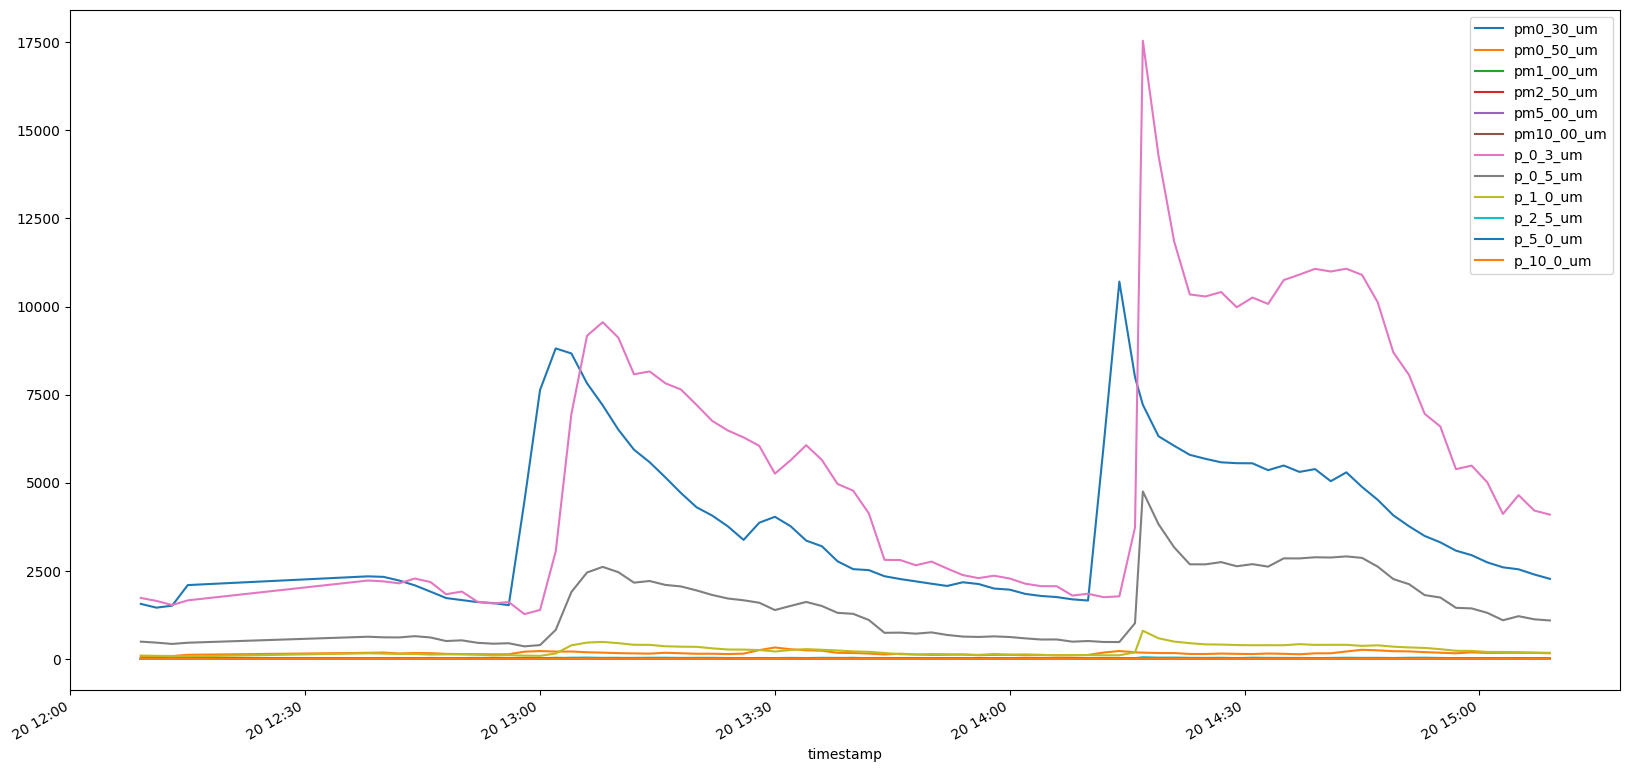

In [32]:
df = pd.merge(ref_count, lcs, on='timestamp', how='inner')
df = df.sort_values(by='timestamp')
df[['pm0_30_um',
   'pm0_50_um', 
   'pm1_00_um', 
   'pm2_50_um', 
   'pm5_00_um', 
   'pm10_00_um']] = df[['pm0_30_um',
   'pm0_50_um', 
   'pm1_00_um', 
   'pm2_50_um', 
   'pm5_00_um', 
   'pm10_00_um',]].astype(float)/10
# df = df[df['timestamp'] < datetime.datetime(2023, 9, 5, 19, 42, 0, 0)]
counts = counts
df.plot(x='timestamp', y=counts, figsize=(20,10), label=counts)
df[['timestamp', *counts]]
# df.plot(x='timestamp', y=['pm0_30_um', 'p_0_3_um'], figsize=(20,10), label=['pm2_5_lcs'])
# df.plot(x='timestamp', y=['pm0_30_um', 'p_0_3_um'], figsize=(20,10), label=['pm2_5_ref', 'pm2_5_lcs'])

In [55]:
df.to_csv('test.csv', index=None)

<Axes: >

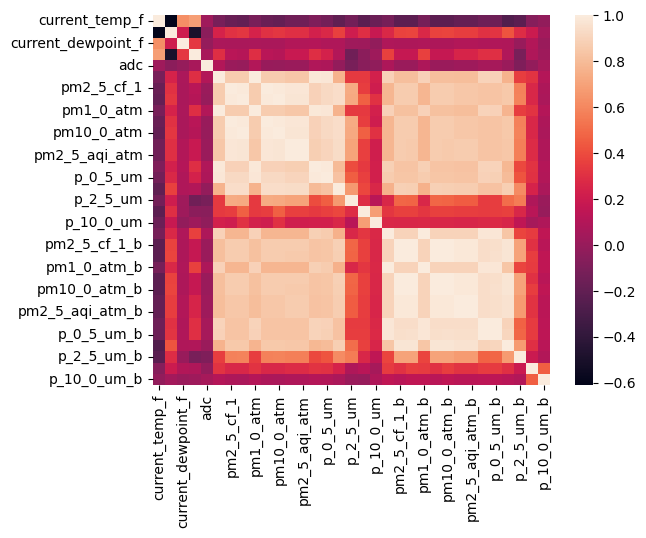

In [17]:
sns.heatmap(lcs.drop(columns=['location','timestamp']).corr())

<Axes: >

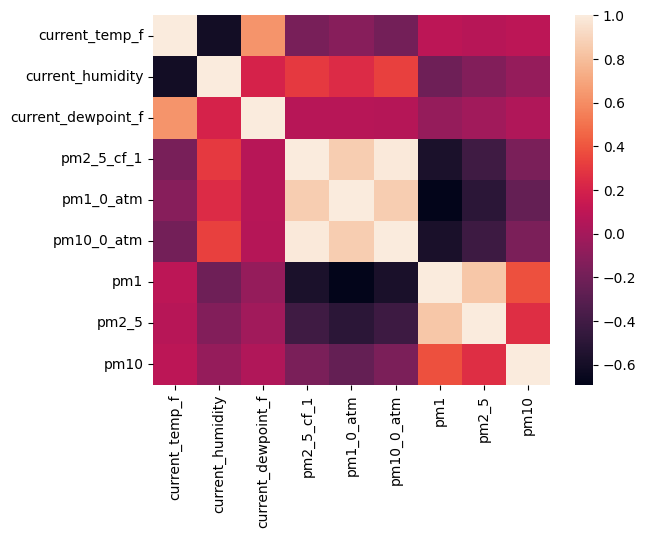

In [32]:
df = pd.concat([lcs.drop(columns=['location','timestamp']), ref_pm.drop(columns=['location','timestamp'])], axis=1)
attrib = df[[
    'current_temp_f',
    'current_humidity',
    'current_dewpoint_f',
    'pm2_5_cf_1',
    'pm1_0_atm',
    'pm10_0_atm',
    'pm1',
    'pm2_5',
    'pm10'
]]
sns.heatmap(attrib.corr())

In [5]:
import pandas as pd
pd.merge(lcs, ref_pm, how='outer', on='timestamp')

,timestamp,current_temp_f,current_humidity,current_dewpoint_f,pressure,adc,pm1_0_cf_1,pm2_5_cf_1,pm10_0_cf_1,pm1_0_atm,...,p_0_5_um_b,p_1_0_um_b,p_2_5_um_b,p_5_0_um_b,p_10_0_um_b,location_x,pm1,pm2_5,pm10,location_y
0,2023-09-05 16:38:00,76.0,67.0,64.0,998.82,0.00,12.00,22.23,22.80,12.00,...,541.02,135.26,10.98,0.67,0.12,Lab,NaN,NaN,NaN,NaN
1,2023-09-05 16:40:00,77.0,65.0,64.0,998.87,0.04,12.91,23.18,24.46,12.91,...,547.19,135.87,7.19,0.00,0.00,Lab,NaN,NaN,NaN,NaN
2,2023-09-05 16:42:00,77.0,63.0,63.0,998.84,0.04,11.04,20.81,21.58,11.04,...,515.32,121.88,10.23,0.00,0.00,Lab,7.4,8.0,8.8,Lab
3,2023-09-05 16:44:00,77.0,61.0,62.0,998.79,0.04,11.25,20.73,21.98,11.22,...,513.93,131.44,7.47,0.49,0.25,Lab,7.2,8.6,10.8,Lab
4,2023-09-05 16:46:00,77.0,60.0,62.0,998.82,0.04,10.95,19.82,20.79,10.95,...,541.39,149.32,17.70,0.79,0.12,Lab,7.4,8.4,9.5,Lab
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,2023-09-06 10:42:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,Lab
1083,2023-09-06 10:43:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,Lab
1084,2023-09-06 10:44:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,Lab
1085,2023-09-06 10:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,Lab
